<a href="https://colab.research.google.com/github/AAskarkyzy/MSW/blob/main/MSW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Interpolace a aproximace funkce jedné proměnné

Chyby interpolace pro polynom:
{'linear': 3146.2829096586065, 'quadratic': 1188.3461306721556, 'cubic': 1796.1788782603878, 'spline': 687.0993592841919}
Chyby interpolace pro harmonickou funkci:
{'linear': 46.6848507310413, 'quadratic': 941.4779382598404, 'cubic': 15558.812365394548, 'spline': 75.40113081960492}
Chyby interpolace pro logaritmickou funkci:
{'linear': 5.192115980981063, 'quadratic': 11.192729007298308, 'cubic': 42.179115913709516, 'spline': 5.416231541972585}


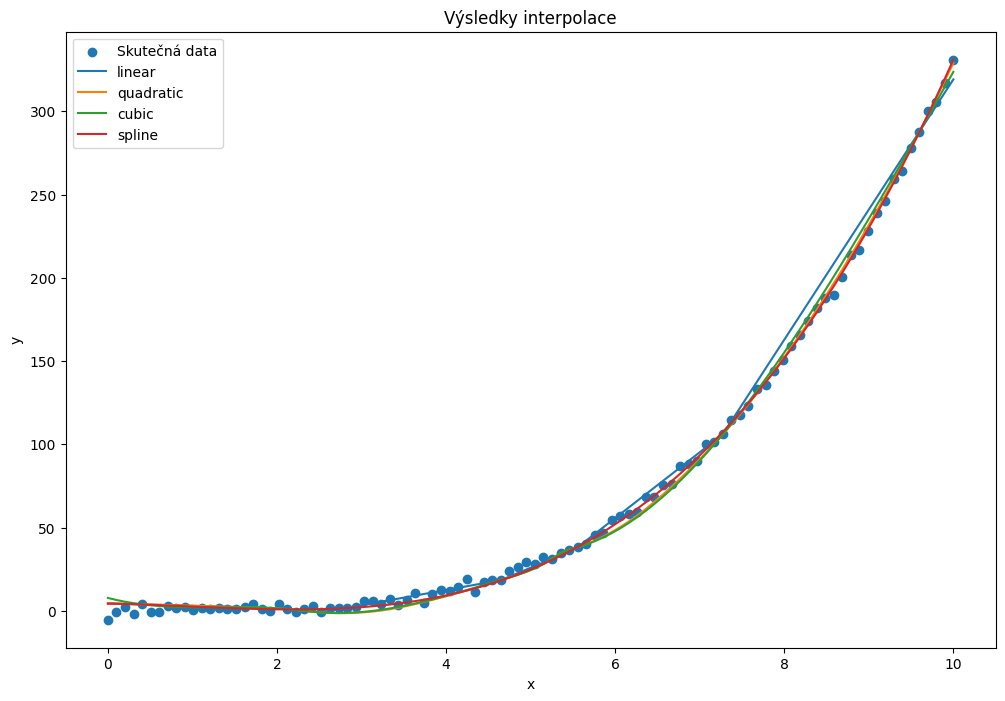

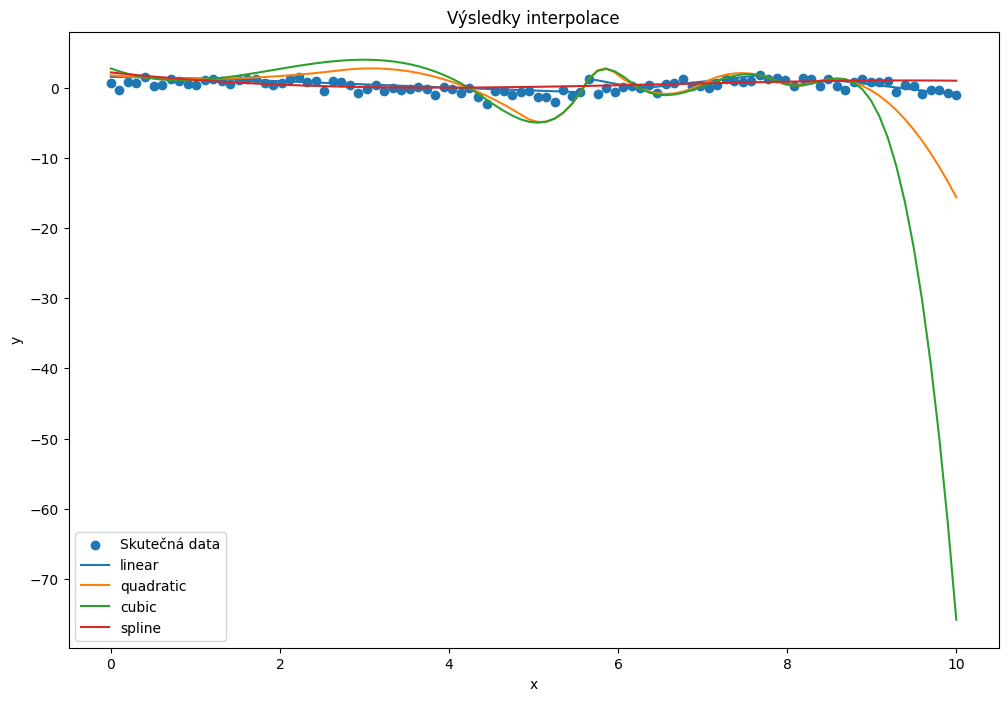

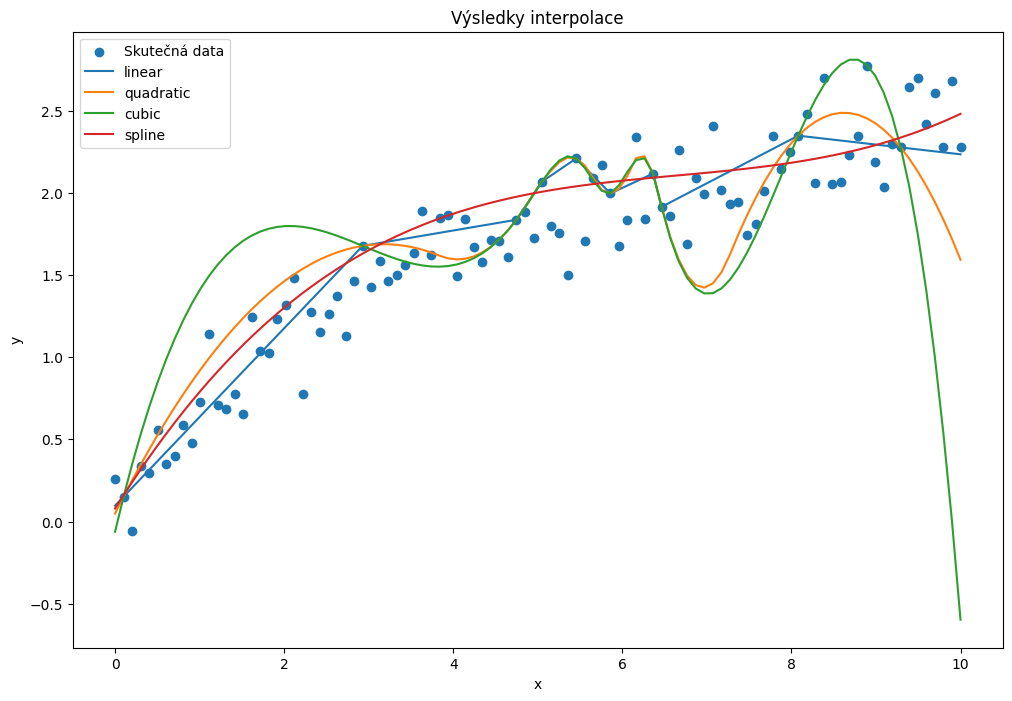

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, UnivariateSpline

# Definice tri ruznych funkci s pridanym šumem
def polynomial_function(x):
    return 0.5 * x**3 - 2 * x**2 + 3 * x + np.random.normal(scale=2, size=len(x))

def harmonic_function(x):
    return np.sin(x) + np.random.normal(scale=0.5, size=len(x))

def logarithmic_function(x):
    return np.log(x + 1) + np.random.normal(scale=0.2, size=len(x))

# Vytvoreni nahodnych bodu na krivkach
def generate_random_points(x, y, num_points):
    # generuje nahodne indexy bez opakovani
    indices = np.random.choice(len(x), num_points, replace=False)
    return x[indices], y[indices]

# Interpolace funkci a vyhodnoceni presnosti
def evaluate_interpolation(x, y, num_points):
    # seznam paru x,y
    original_data = list(zip(x, y))
    # vola funkci generate_random_points s vstupni daty x,y a poctem bodu num_points
    # vrati vzorkovane hodnoty x,y
    sampled_x, sampled_y = generate_random_points(x, y, num_points)

    # Serazeni vzestupne podle x
    sorted_indices = np.argsort(sampled_x)
    # seradi vzorkovane hodnoty x podle serazenych indexu
    sampled_x = sampled_x[sorted_indices]
    sampled_y = sampled_y[sorted_indices]

    methods = ['linear', 'quadratic', 'cubic']
    interpolations = {}

    for method in methods:
        # vytvari interpolacni funkci pomoci metody "interp1d"
        # bude provedena interpolace na zaklade x; y bude interpolovany
        # "extrapolate" rika funkci aby pokracovala v interpolaci mimo rozsah vzorku samples_x, sampled_y
        interp_func = interp1d(sampled_x, sampled_y, kind=method, fill_value="extrapolate")
        interpolated_y = interp_func(x)
        # uklada vypoctene interpolovane hodnoty do slovniku pod prislusnym klicem
        interpolations[method] = interpolated_y

    # vytvari kubickou spline interpolaci
    # "s" je vyhlazovací parametr
    spline = UnivariateSpline(sampled_x, sampled_y, s=num_points)
    # vypocita hodnoty spline interpolace pro vsechny hodnoty x
    spline_y = spline(x)
    # uklada hodnoty spline do slovniku pod klicem spline
    interpolations['spline'] = spline_y

    # bude obsahovat soucty kvadratu chyb pro kazdou metodu interpolace
    errors = {}
    # vypocita soucet ctvercu rozdilu
    for method, interpolated_y in interpolations.items():
        # pro kazdou metodu interpolace se vypocte soucet kvadratu rozdilu
        # mezi interpolovanymi hodnotami y a puvodnimi hodnotami y
        errors[method] = np.sum((interpolated_y - y)**2)

    # vrati slovnik "errros", "original_data" s x,y, "interpolations" s interpolovana data y
    return errors, original_data, interpolations


# Vykresleni vysledku interpolace
def plot_interpolation_results(x, y, original_data, interpolations):
    # vytvoreni noveho grafu
    plt.figure(figsize=(12, 8))
    # pridavaji se body na graf
    plt.scatter(x, y, label='Skutečná data')
    for method, interpolated_y in interpolations.items():
        # pro kazdou metodu interpolace se vykresli graf
        plt.plot(x, interpolated_y, label=method)
    plt.legend()
    plt.title('Výsledky interpolace')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Generovani dat
x = np.linspace(0, 10, 100)
# pro kazdy x se vypocita odpovidajici hodnotu "y_poly" s pomoci funkce "polynomial_function"
y_poly = polynomial_function(x)
y_harm = harmonic_function(x)
y_log = logarithmic_function(x)

# Hodnoceni interpolace pro kazdou funkci
num_points = 10  # pocet nahodnych bodu pro vyhodnoceni interpolace
# vyhodnoceni interpolace pro data (x,y_poly)
errors_poly, original_data_poly, interpolations_poly = evaluate_interpolation(x, y_poly, num_points)
# vyhodnoceni interpolace pro data (x,y_harm)
errors_harm, original_data_harm, interpolations_harm = evaluate_interpolation(x, y_harm, num_points)
#
errors_log, original_data_log, interpolations_log = evaluate_interpolation(x, y_log, num_points)

# Vystupni vysledky a grafy
print("Chyby interpolace pro polynom:")
print(errors_poly)
print("Chyby interpolace pro harmonickou funkci:")
print(errors_harm)
print("Chyby interpolace pro logaritmickou funkci:")
print(errors_log)

plot_interpolation_results(x, y_poly, original_data_poly, interpolations_poly)
plot_interpolation_results(x, y_harm, original_data_harm, interpolations_harm)
plot_interpolation_results(x, y_log, original_data_log, interpolations_log)
